In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [224]:
X = pd.read_csv("data.csv")
X

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3.0,2.0,NaN,4.0,2,NaN,False,NaN
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1.0,1.0,"<span class=""star fill"">1</span>",1.0,1,NaN,False,1.0
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4.0,2.0,"<span class=""star fill"">4</span>",1.0,1,NaN,False,NaN
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2.0,5.0,"<span class=""star fill"">2</span>",2.0,1,NaN,False,2.0
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1.0,3.0,"<span class=""star fill"">1</span>",2.0,3,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,"""nice flight with good cabin service""",9,11/09/2017,✅ Verified Review | London Heathrow to Biarri...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,Sep-17,4.0,5.0,NaN,4.0,4,NaN,True,NaN
1196,"""they are just an embarrassment""",2,11/09/2017,✅ Verified Review | London Gatwick to Funchal...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,Sep-17,1.0,1.0,NaN,2.0,1,NaN,False,NaN
1197,"""very good flight again""",8,09/09/2017,✅ Verified Review | Zakinthos to London Heath...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,Sep-17,4.0,5.0,"<span class=""star fill"">2</span>",2.0,5,NaN,True,NaN
1198,"""expensive at £343 return""",8,09/09/2017,✅ Verified Review | Flew British Airways from...,False,A319,Business,Economy Class,Belfast City to London Heathrow,Sep-17,3.0,4.0,NaN,5.0,2,NaN,True,NaN


In [225]:
X.shape

(1200, 18)

In [226]:
X.head()

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3.0,2.0,NaN,4.0,2,NaN,False,NaN
1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1.0,1.0,"<span class=""star fill"">1</span>",1.0,1,NaN,False,1.0
2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4.0,2.0,"<span class=""star fill"">4</span>",1.0,1,NaN,False,NaN
3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2.0,5.0,"<span class=""star fill"">2</span>",2.0,1,NaN,False,2.0
4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1.0,3.0,"<span class=""star fill"">1</span>",2.0,3,NaN,True,NaN


In [227]:
X.tail()

,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi_and_connecticity,recommend,wifi_and_connectivity
1195,"""nice flight with good cabin service""",9,11/09/2017,✅ Verified Review | London Heathrow to Biarri...,False,A319,Couple Leisure,Economy Class,London Heathrow to Biarritz,Sep-17,4.0,5.0,NaN,4.0,4,NaN,True,NaN
1196,"""they are just an embarrassment""",2,11/09/2017,✅ Verified Review | London Gatwick to Funchal...,False,A320,Couple Leisure,Economy Class,London Gatwick to Funchal,Sep-17,1.0,1.0,NaN,2.0,1,NaN,False,NaN
1197,"""very good flight again""",8,09/09/2017,✅ Verified Review | Zakinthos to London Heath...,False,A320,Family Leisure,Business Class,Zakinthos to London Heathrow,Sep-17,4.0,5.0,"<span class=""star fill"">2</span>",2.0,5,NaN,True,NaN
1198,"""expensive at £343 return""",8,09/09/2017,✅ Verified Review | Flew British Airways from...,False,A319,Business,Economy Class,Belfast City to London Heathrow,Sep-17,3.0,4.0,NaN,5.0,2,NaN,True,NaN
1199,"""staff were extremely friendly""",8,09/09/2017,✅ Verified Review | Toronto to London Heathro...,False,Boeing 777-200,Business,Business Class,Toronto to London Heathrow,Sep-17,4.0,5.0,NaN,4.0,4,NaN,True,NaN


In [228]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1200 non-null   object 
 1   rating                 1200 non-null   int64  
 2   review_date            1200 non-null   object 
 3   review                 1200 non-null   object 
 4   trip_verified          1200 non-null   bool   
 5   aircraft               720 non-null    object 
 6   type_of_traveller      1199 non-null   object 
 7   seat_type              1200 non-null   object 
 8   route                  1198 non-null   object 
 9   date_flown             1200 non-null   object 
 10  seat_comfort           1124 non-null   float64
 11  cabin_staff_service    1117 non-null   float64
 12  food_and_beverages     670 non-null    object 
 13  ground_service         1147 non-null   float64
 14  value_for_money        1200 non-null   int64  
 15  wifi

In [229]:
X.describe()

,rating,seat_comfort,cabin_staff_service,ground_service,value_for_money,wifi_and_connecticity,wifi_and_connectivity
count,1200.000000,1124.000000,1117.000000,1147.000000,1200.000000,0.0,287.000000
mean,4.397500,2.782028,3.179946,2.782040,2.530833,NaN,2.149826
std,3.238554,1.377079,1.526595,1.486856,1.468848,NaN,1.482482
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,NaN,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,NaN,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,NaN,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000


In [230]:
X.isnull().sum()

title                       0
rating                      0
review_date                 0
review                      0
trip_verified               0
aircraft                  480
type_of_traveller           1
seat_type                   0
route                       2
date_flown                  0
seat_comfort               76
cabin_staff_service        83
food_and_beverages        530
ground_service             53
value_for_money             0
wifi_and_connecticity    1200
recommend                   0
wifi_and_connectivity     913
dtype: int64

In [231]:
X.columns

Index(['title', 'rating', 'review_date', 'review', 'trip_verified', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_and_beverages', 'ground_service',
       'value_for_money', 'wifi_and_connecticity', 'recommend',
       'wifi_and_connectivity'],
      dtype='object')

In [450]:
class DataProcessor:
    def __init__(self, filename):
        self.filename = filename
        
    def load_data(self):
        df = pd.read_csv(self.filename)
        return df
    
    def clean_data(self, data):
        remove_col = ['food_and_beverages', 'wifi_and_connecticity', 'wifi_and_connectivity']
        data = data.drop(remove_col, axis=1)

        data = data.dropna()
        
        data = data.reset_index(drop=True)
        
        return data

In [451]:
data_processor = DataProcessor('data.csv')

data = data_processor.load_data()

clean_data = data_processor.clean_data(data)

In [452]:
clean_data.columns

Index(['title', 'rating', 'review_date', 'review', 'trip_verified', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'ground_service', 'value_for_money',
       'recommend'],
      dtype='object')

In [453]:
clean_data.shape

(712, 15)

In [454]:
clean_data.isnull().sum()

title                  0
rating                 0
review_date            0
review                 0
trip_verified          0
aircraft               0
type_of_traveller      0
seat_type              0
route                  0
date_flown             0
seat_comfort           0
cabin_staff_service    0
ground_service         0
value_for_money        0
recommend              0
dtype: int64

In [536]:
class DataAnalyzer:
    
    def get_average_of_column(self, data, col_1, col_2):
        monthly_avg = data.groupby(col_1)[col_2].mean().reset_index()
        return monthly_avg
    
    def get_distribution_of_column(self, data, col_1):
        rating_dist = data[col_1].value_counts(normalize=False).reset_index()
        rating_dist.columns = [col_1, 'frequency']
        return rating_dist
    
    def get_median_of_column(self, data, col_1):
        rating_dist = data[col_1].value_counts(normalize=False).reset_index()
        rating_dist.columns = [col_1, 'frequency']
        median_rating = np.median(data[col_1])
        return median_rating
    
    def get_mod_of_column(self, data, column):
        feedback_count = data[column].value_counts().reset_index()
        feedback_count.columns = ['values', 'frequency']
        return feedback_count

In [539]:
analyzer = DataAnalyzer()

avg_ratings = analyzer.get_average_of_column(clean_data, 'review_date', 'rating')
rating_dist = analyzer.get_distribution_of_column(clean_data, 'rating')
median_rating = analyzer.get_median_of_column(clean_data, 'rating')
feedback_count = analyzer.get_mod_of_column(clean_data, 'value_for_money')

In [666]:
class DataVisualizer:
    
    def plot_line_chart(self, clean_data, num_of_col, x_column_name, y_column_name):
        d = data.head(num_of_col)
        sns.lineplot(x=x_column_name, y=y_column_name, data=d)
        plt.show()
        
    def plot_distribution(self, clean_data, column_name, num_of_bins):
        sns.histplot(data=clean_data, x=column_name, bins=num_of_bins, kde=True, color="green")
        plt.show()
    
    def plot_pie(self, clean_data, column_name):
        plt.pie(data[column_name].value_counts().values, labels=clean_data[column_name].value_counts().index)
        plt.show()
        
    def plot_scatter(self, clean_data, num_of_col, x_column_name, y_column_name, hue_col):
        d = data.head(num_of_col)
        sns.color_palette("tab10")
        sns.scatterplot(x=x_column_name, y=y_column_name, hue=hue_col, data=d)
        sns.regplot(x=x_column_name, y=y_column_name, data=data, scatter=False)
        plt.show()
        
    def heat_map(self, clean_data):
        corr = clean_data.corr()
        sns.heatmap(corr)
        plt.show()
        
    def box_plot(self, clean_data, x_column_name, y_column_name):
        sns.boxplot(x=x_column_name, y=y_column_name, data=clean_data)
        plt.show()
        
    def bar_plot(self, clean_data, num_of_col, x_column_name, y_column_name, hue_col):
        d = data.head(num_of_col)
        sns.barplot(x=x_column_name, y=y_column_name, hue=hue_col, ci=None, data=d)
        plt.show()

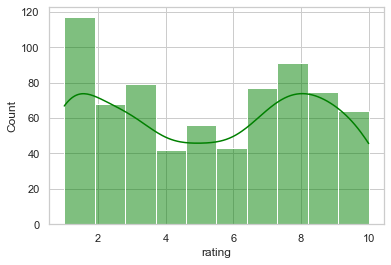

In [667]:
# Create an instance of the DataVisualizer class
visualizer = DataVisualizer() 

visualizer.plot_distribution(clean_data, 'rating', 10)

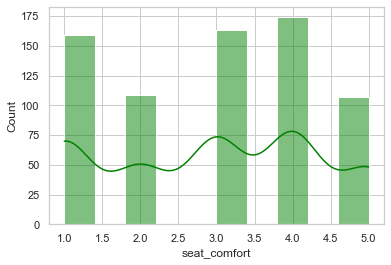

In [675]:
visualizer.plot_distribution(clean_data, 'seat_comfort', 10)

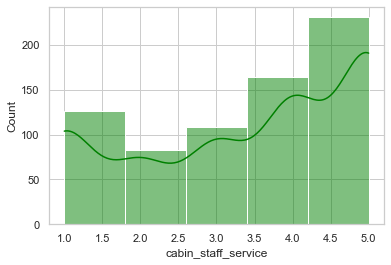

In [676]:
visualizer.plot_distribution(clean_data, 'cabin_staff_service', 5)

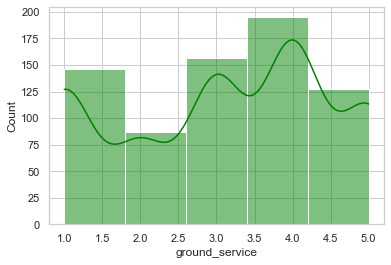

In [677]:
visualizer.plot_distribution(clean_data, 'ground_service', 5)

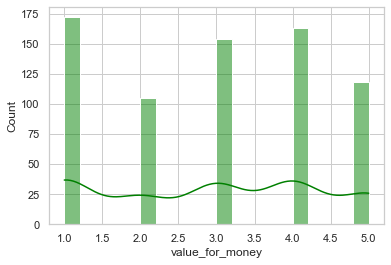

In [679]:
visualizer.plot_distribution(clean_data, 'value_for_money', 20)

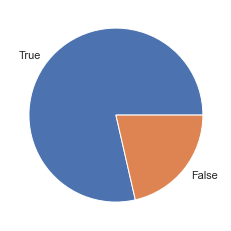

In [642]:
visualizer.plot_pie(clean_data, 'trip_verified')

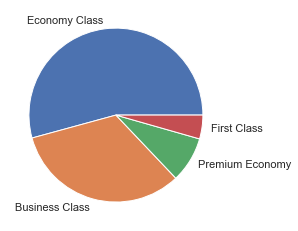

In [643]:
visualizer.plot_pie(clean_data, 'seat_type')

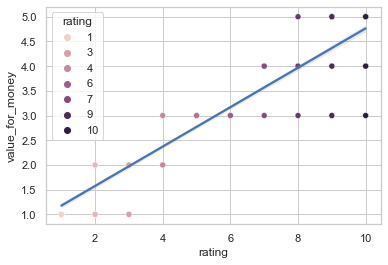

In [647]:
visualizer.plot_scatter(clean_data, 50, 'rating', 'value_for_money', 'rating')

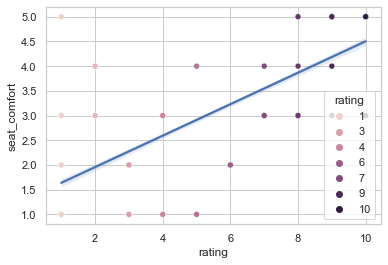

In [682]:
visualizer.plot_scatter(clean_data, 50, 'rating', 'seat_comfort', 'rating')

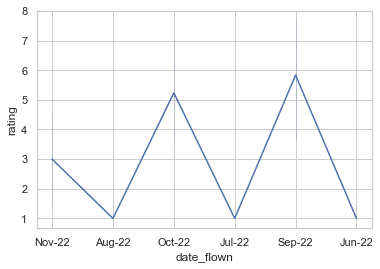

In [692]:
visualizer.plot_line_chart(clean_data, 30, 'date_flown', 'rating')

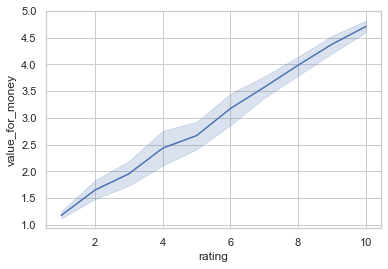

In [686]:
visualizer.plot_line_chart(clean_data, 712, 'rating', 'value_for_money')

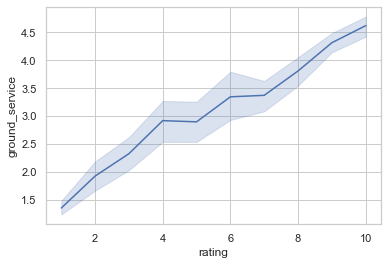

In [687]:
visualizer.plot_line_chart(clean_data, 712, 'rating', 'ground_service')

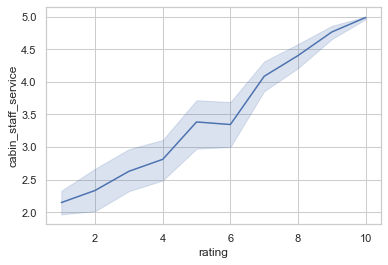

In [688]:
visualizer.plot_line_chart(clean_data, 712, 'rating', 'cabin_staff_service')

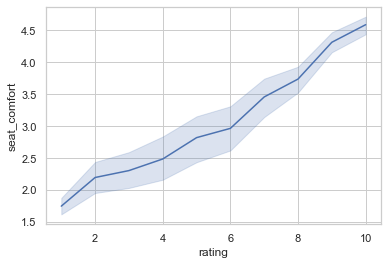

In [689]:
visualizer.plot_line_chart(clean_data, 712, 'rating', 'seat_comfort')

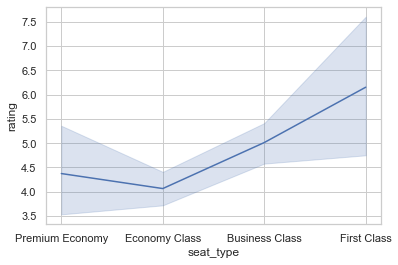

In [691]:
visualizer.plot_line_chart(clean_data, 712, 'seat_type', 'rating')

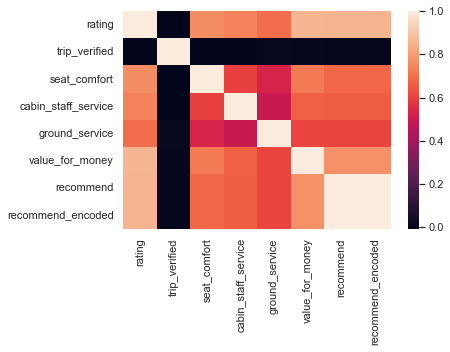

In [569]:
visualizer.heat_map(clean_data)

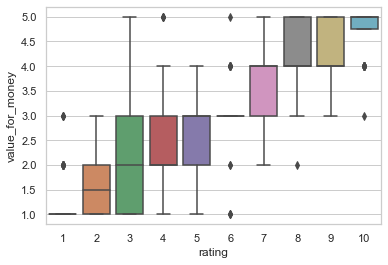

In [610]:
visualizer.box_plot(clean_data, 'rating', 'value_for_money')

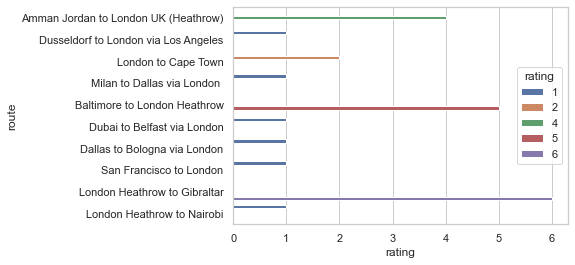

In [694]:
visualizer.bar_plot(clean_data, 10, 'rating', 'route', 'rating')

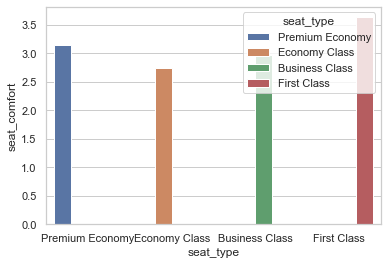

In [621]:
visualizer.bar_plot(clean_data, 712, 'seat_type', 'seat_comfort', 'seat_type')

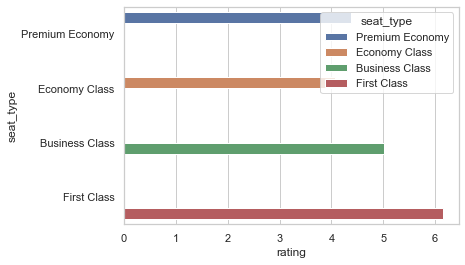

In [699]:
visualizer.bar_plot(clean_data, 712, 'rating', 'seat_type', 'seat_type')

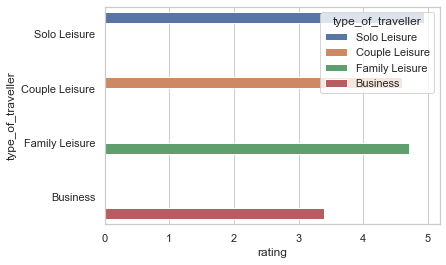

In [700]:
visualizer.bar_plot(clean_data, 712, 'rating', 'type_of_traveller', 'type_of_traveller')

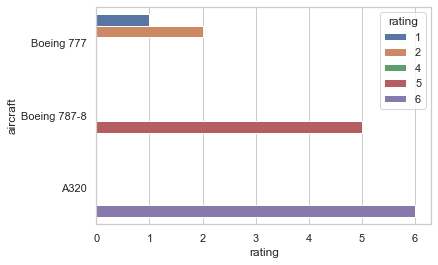

In [709]:
visualizer.bar_plot(clean_data, 10, 'rating', 'aircraft', 'rating')